In [1]:
#Packages for data reading and manipulation
import pandas as pd
import numpy as np
#for data visualization
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objs as go
#for encoding
from sklearn.preprocessing import OneHotEncoder
#for data scaling
from sklearn.preprocessing import RobustScaler
#for data splitting
from sklearn.model_selection import train_test_split
#for modelling
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
#for evaluation 
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

2023-10-05 09:09:53.183066: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = pd.read_csv("loan_data.csv") #loading data
df.head()

credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0               0  
1            0        0               0  
2            0        0               0  
3            0        0               0  
4            1        0               0

In [3]:
# Describe Dataframe
df.describe()

credit.policy     int.rate  installment  log.annual.inc          dti  \
count    9578.000000  9578.000000  9578.000000     9578.000000  9578.000000   
mean        0.804970     0.122640   319.089413       10.932117    12.606679   
std         0.396245     0.026847   207.071301        0.614813     6.883970   
min         0.000000     0.060000    15.670000        7.547502     0.000000   
25%         1.000000     0.103900   163.770000       10.558414     7.212500   
50%         1.000000     0.122100   268.950000       10.928884    12.665000   
75%         1.000000     0.140700   432.762500       11.291293    17.950000   
max         1.000000     0.216400   940.140000       14.528354    29.960000   

              fico  days.with.cr.line     revol.bal   revol.util  \
count  9578.000000        9578.000000  9.578000e+03  9578.000000   
mean    710.846314        4560.767197  1.691396e+04    46.799236   
std      37.970537        2496.930377  3.375619e+04    29.014417   
min     612.000000         178.958333  0.000000e+00     0.000000   
25%     682.000000        2820.000000  3.187000e+03    22.600000   
50%     707.000000        4139.958333  8.596000e+03    46.300000   
75%     737.000000        5730.000000  1.824950e+04    70.900000   
max     827.000000       17639.958330  1.207359e+06   119.000000   

       inq.last.6mths  delinq.2yrs      pub.rec  not.fully.paid  
count     9578.000000  9578.000000  9578.000000     9578.000000  
mean         1.577469     0.163708     0.062122        0.160054  
std          2.200245     0.546215     0.262126        0.366676  
min          0.000000     0.000000     0.000000        0.000000  
25%          0.000000     0.000000     0.000000        0.000000  
50%          1.000000     0.000000     0.000000        0.000000  
75%          2.000000     0.000000     0.000000        0.000000  
max         33.000000    13.000000     5.000000        1.000000

In [4]:
# Check for any null

# df.isnull().sum()

In [5]:
# purpose is the only object inn df

df.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

In [6]:
df.shape

(9578, 14)

In [7]:
df.columns


Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

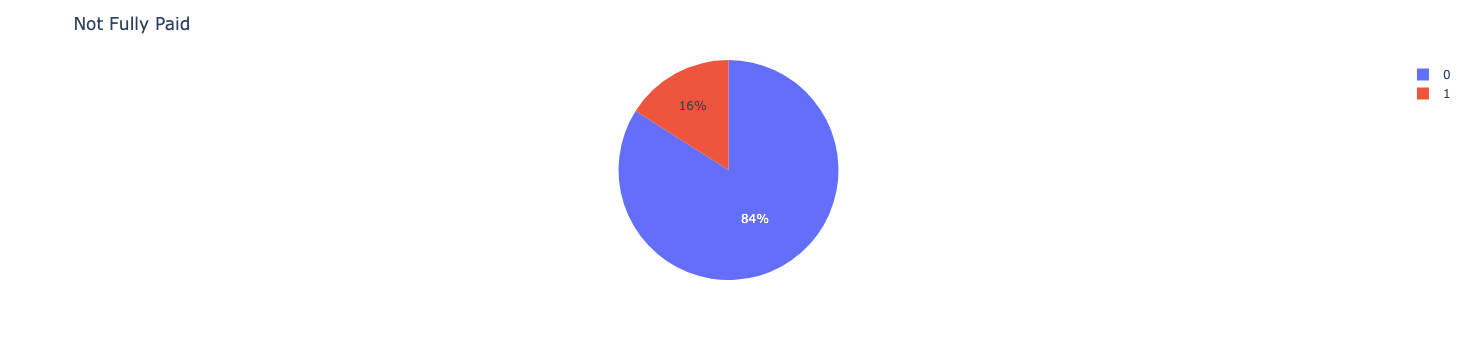

In [8]:
# Identify how many are not fully paid


target_value_counts = df['not.fully.paid'].value_counts()

fig = px.pie(df, names=target_value_counts.index, values=target_value_counts.values)

fig.update_layout(title='Not Fully Paid')

fig.show()

               purpose  not.fully.paid  count
0            all_other               0   1944
1            all_other               1    387
2          credit_card               0   1116
3          credit_card               1    146
4   debt_consolidation               0   3354
5   debt_consolidation               1    603
6          educational               0    274
7          educational               1     69
8     home_improvement               0    522
9     home_improvement               1    107
10      major_purchase               0    388
11      major_purchase               1     49
12      small_business               0    447
13      small_business               1    172


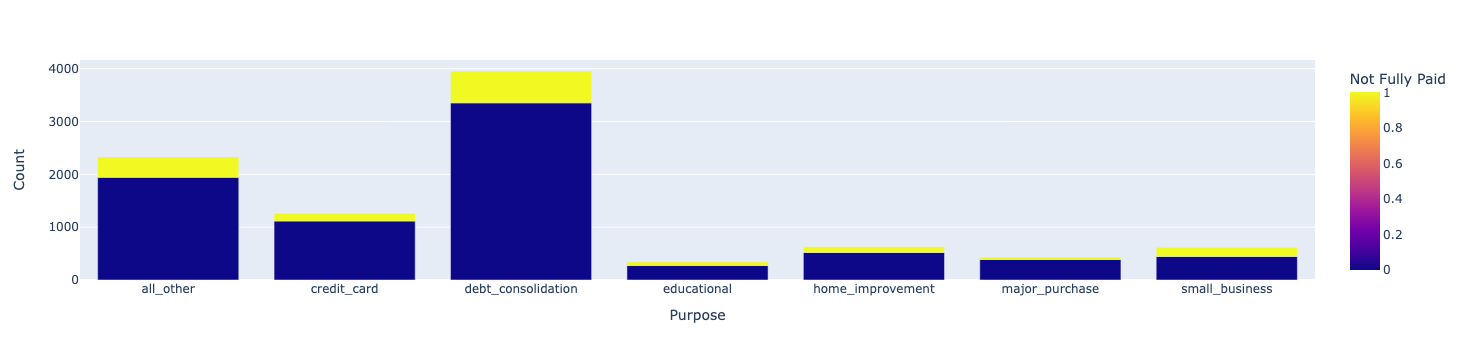

In [9]:
# Stacked Bar to identify purpose(our only object in the dataset)

grouped = df.groupby(['purpose', 'not.fully.paid']).size().reset_index(name='count')
print(grouped)
fig = px.bar(grouped, x='purpose', y='count', color='not.fully.paid', 
             barmode='group', labels={'count': 'Count', 'purpose': 'Purpose', 'not.fully.paid': 'Not Fully Paid'})
fig.show()

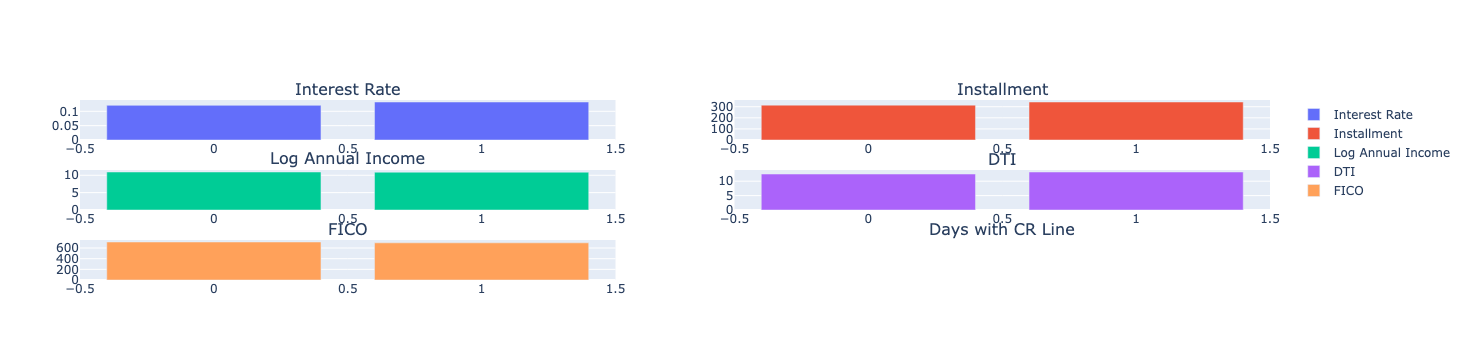

In [10]:
# Create pivot tables to calculates the mean (average) values of several numerical columns using the not fully paid column. We have to split our groupings into two. Due to a real estate limit. 
# Group 1-5, and Group 6 - 11

grouped1 = df.pivot_table(values='int.rate', index='not.fully.paid', aggfunc='mean')

grouped2 = df.pivot_table(values='installment', index='not.fully.paid', aggfunc='mean')

grouped3 = df.pivot_table(values='log.annual.inc', index='not.fully.paid', aggfunc='mean')

grouped4 = df.pivot_table(values='dti', index='not.fully.paid', aggfunc='mean')

grouped5 = df.pivot_table(values='fico', index='not.fully.paid', aggfunc='mean')


fig = sp.make_subplots(rows=3, cols=2,
                       subplot_titles=['Interest Rate', 'Installment', 'Log Annual Income', 'DTI',
                                       'FICO', 'Days with CR Line', 'Revolving Balance', 'Revolving Utilization',
                                       'Delinq. in Last 2 Years', 'Inquiries in Last 6 Months', 'Public Records'])

# Add traces for each pivot table to the subplot
fig.add_trace(go.Bar(x=grouped1.index, y=grouped1['int.rate'], name='Interest Rate'), row=1, col=1)
fig.add_trace(go.Bar(x=grouped2.index, y=grouped2['installment'], name='Installment'), row=1, col=2)
fig.add_trace(go.Bar(x=grouped3.index, y=grouped3['log.annual.inc'], name='Log Annual Income'), row=2, col=1)
fig.add_trace(go.Bar(x=grouped4.index, y=grouped4['dti'], name='DTI'), row=2, col=2)
fig.add_trace(go.Bar(x=grouped5.index, y=grouped5['fico'], name='FICO'), row=3, col=1)

fig.show()

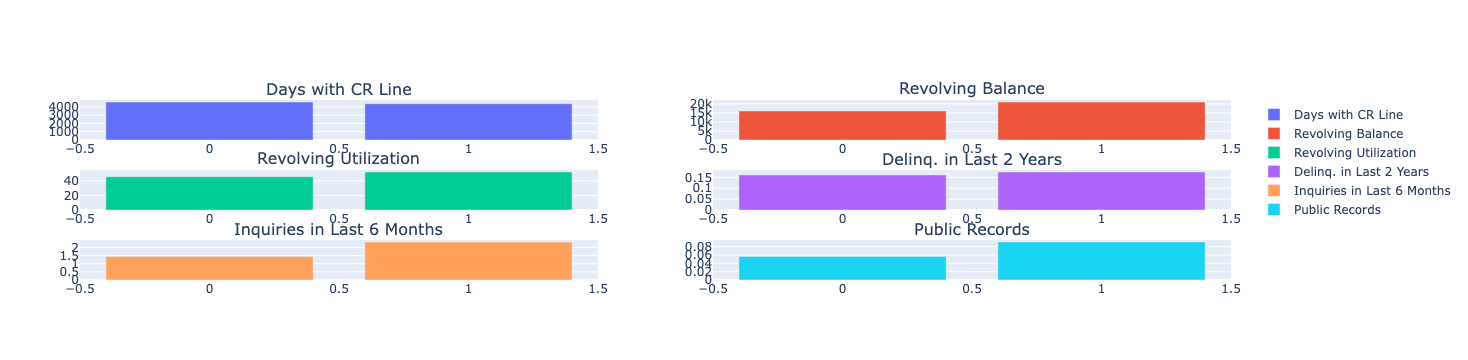

In [11]:
grouped6 = df.pivot_table(values='days.with.cr.line', index='not.fully.paid', aggfunc='mean')

grouped7 = df.pivot_table(values='revol.bal', index='not.fully.paid', aggfunc='mean')

grouped8 = df.pivot_table(values='revol.util', index='not.fully.paid', aggfunc='mean')

grouped9 = df.pivot_table(values='delinq.2yrs', index='not.fully.paid', aggfunc='mean')

grouped10 = df.pivot_table(values='inq.last.6mths', index='not.fully.paid', aggfunc='mean')

grouped11 = df.pivot_table(values='pub.rec', index='not.fully.paid', aggfunc='mean')

fig = sp.make_subplots(rows=3, cols=2,
                       subplot_titles=['Days with CR Line', 'Revolving Balance', 'Revolving Utilization',
                                       'Delinq. in Last 2 Years', 'Inquiries in Last 6 Months', 'Public Records'])
fig.add_trace(go.Bar(x=grouped6.index, y=grouped6['days.with.cr.line'], name='Days with CR Line'), row=1, col=1)
fig.add_trace(go.Bar(x=grouped7.index, y=grouped7['revol.bal'], name='Revolving Balance'), row=1, col=2)
fig.add_trace(go.Bar(x=grouped8.index, y=grouped8['revol.util'], name='Revolving Utilization'), row=2, col=1)
fig.add_trace(go.Bar(x=grouped9.index, y=grouped9['delinq.2yrs'], name='Delinq. in Last 2 Years'), row=2, col=2)
fig.add_trace(go.Bar(x=grouped10.index, y=grouped10['inq.last.6mths'], name='Inquiries in Last 6 Months'), row=3, col=1)
fig.add_trace(go.Bar(x=grouped11.index, y=grouped11['pub.rec'], name='Public Records'), row=3, col=2)

fig.show()

In [12]:
# Use the onehotencoder

encoder = OneHotEncoder(sparse_output=False, drop='first').set_output(transform="pandas")
cat_encoded = encoder.fit_transform(df[['purpose']])
cat_encoded #one hot encoder because the code is nominal there is no hierachical importance

purpose_credit_card  purpose_debt_consolidation  purpose_educational  \
0                     0.0                         1.0                  0.0   
1                     1.0                         0.0                  0.0   
2                     0.0                         1.0                  0.0   
3                     0.0                         1.0                  0.0   
4                     1.0                         0.0                  0.0   
...                   ...                         ...                  ...   
9573                  0.0                         0.0                  0.0   
9574                  0.0                         0.0                  0.0   
9575                  0.0                         1.0                  0.0   
9576                  0.0                         0.0                  0.0   
9577                  0.0                         1.0                  0.0   

      purpose_home_improvement  purpose_major_purchase  purpose_small_business  
0                          0.0                     0.0                     0.0  
1                          0.0                     0.0                     0.0  
2                          0.0                     0.0                     0.0  
3                          0.0                     0.0                     0.0  
4                          0.0                     0.0                     0.0  
...                        ...                     ...                     ...  
9573                       0.0                     0.0                     0.0  
9574                       0.0                     0.0                     0.0  
9575                       0.0                     0.0                     0.0  
9576                       1.0                     0.0                     0.0  
9577                       0.0                     0.0                     0.0  

[9578 rows x 6 columns]

In [13]:
# re-merge into origial df

df = pd.concat([df,cat_encoded],axis=1)

In [14]:
df.columns


Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement',
       'purpose_major_purchase', 'purpose_small_business'],
      dtype='object')

In [15]:
df.head(10)

credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   
5              1         credit_card    0.0788       125.13       11.904968   
6              1  debt_consolidation    0.1496       194.02       10.714418   
7              1           all_other    0.1114       131.22       11.002100   
8              1    home_improvement    0.1134        87.19       11.407565   
9              1  debt_consolidation    0.1221        84.12       10.203592   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   
5  16.98   727        6120.041667      50807        51.0               0   
6   4.00   667        3180.041667       3839        76.8               0   
7  11.08   722        5116.000000      24220        68.6               0   
8  17.25   682        3989.000000      69909        51.1               1   
9  10.00   707        2730.041667       5630        23.0               1   

   delinq.2yrs  pub.rec  not.fully.paid  purpose_credit_card  \
0            0        0               0                  0.0   
1            0        0               0                  1.0   
2            0        0               0                  0.0   
3            0        0               0                  0.0   
4            1        0               0                  1.0   
5            0        0               0                  1.0   
6            0        1               1                  0.0   
7            0        0               1                  0.0   
8            0        0               0                  0.0   
9            0        0               0                  0.0   

   purpose_debt_consolidation  purpose_educational  purpose_home_improvement  \
0                         1.0                  0.0                       0.0   
1                         0.0                  0.0                       0.0   
2                         1.0                  0.0                       0.0   
3                         1.0                  0.0                       0.0   
4                         0.0                  0.0                       0.0   
5                         0.0                  0.0                       0.0   
6                         1.0                  0.0                       0.0   
7                         0.0                  0.0                       0.0   
8                         0.0                  0.0                       1.0   
9                         1.0                  0.0                       0.0   

   purpose_major_purchase  purpose_small_business  
0                     0.0                     0.0  
1                     0.0                     0.0  
2                     0.0                     0.0  
3                     0.0                     0.0  
4                     0.0                     0.0  
5                     0.0                     0.0  
6                     0.0                     0.0  
7                     0.0                     0.0  
8                     0.0                     0.0  
9                     0.0                     0.0

In [16]:
# Remove purpose colum, we don't need a string.

df.drop(['purpose'],axis=1,inplace=True)

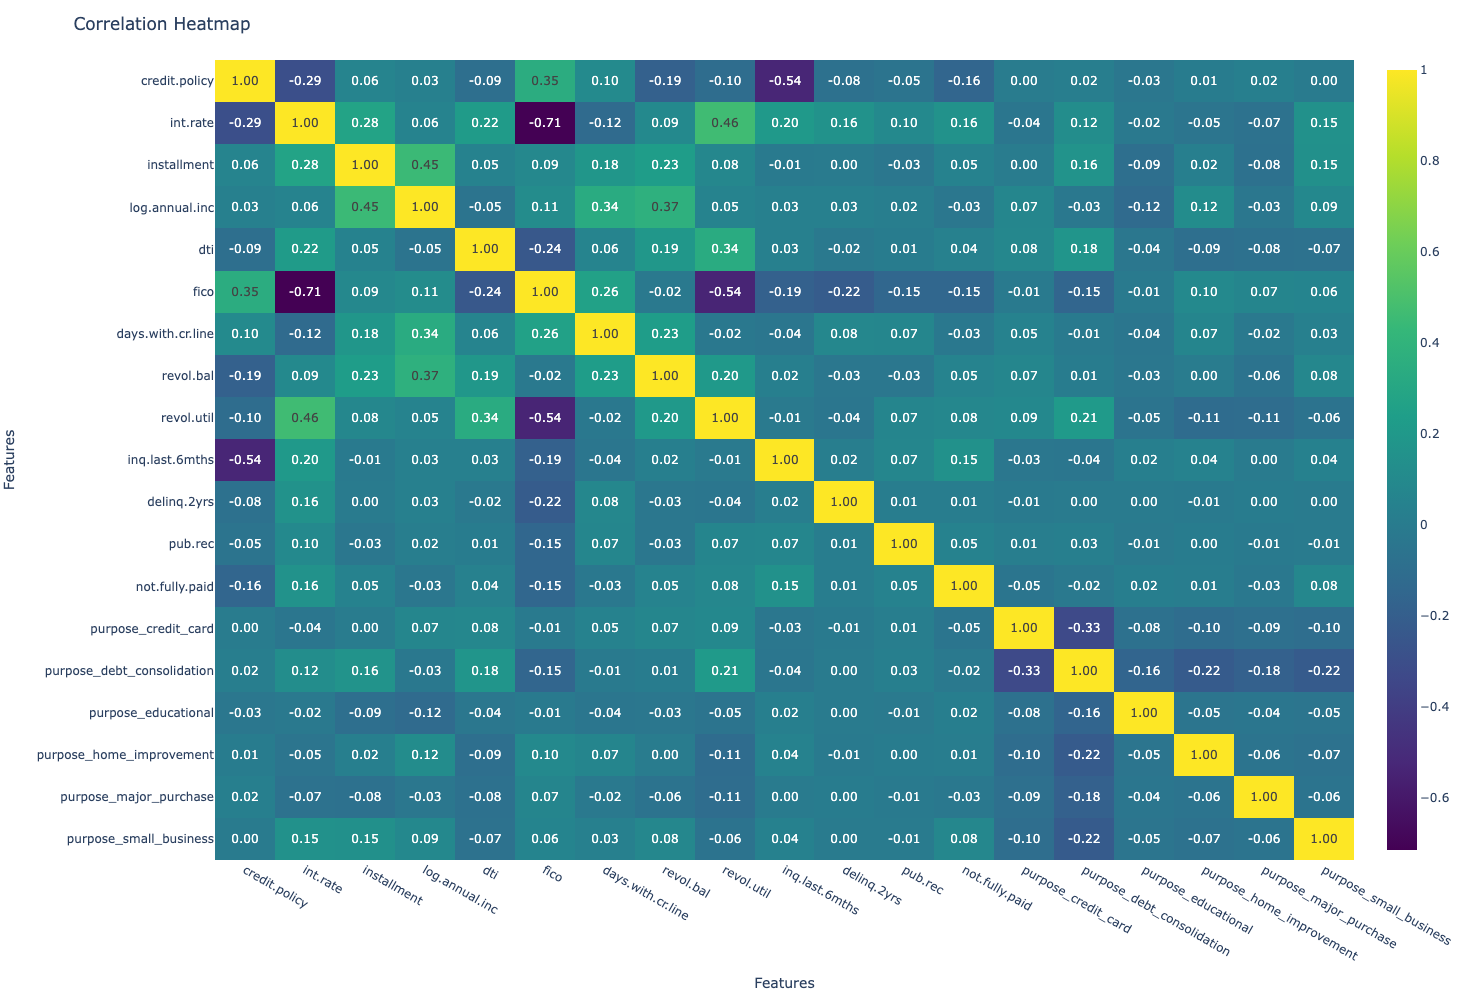

In [17]:
# Create a correlation heatmap

corr = df[['credit.policy', 'int.rate', 'installment', 'log.annual.inc',
                    'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
                    'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid',
                    'purpose_credit_card', 'purpose_debt_consolidation',
                    'purpose_educational', 'purpose_home_improvement',
                    'purpose_major_purchase', 'purpose_small_business']].corr()

fig = px.imshow(corr, text_auto=".2f",color_continuous_scale='Viridis', aspect="auto")

fig.update_layout(title='Correlation Heatmap',
                  xaxis_title='Features',
                  yaxis_title='Features')
fig.update_layout(height=1000)

fig.show()

In [18]:
# Prep our data by Spitting

x = df[['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti', #defining features and target variable
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement',
       'purpose_major_purchase', 'purpose_small_business']]
y = df['not.fully.paid']
print(len(x))
print(len(y))



9578
9578


In [19]:
# 75% train 25% test 

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)
print(x_train.shape)
print(x_test.shape)

(7183, 18)
(2395, 18)


In [20]:
# Scale our data w/standard scaler

from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [21]:
 # createmodel with four hidden layers, we use sigmoid as output layer for binary classification. We experimennted with ReLu as a 1-3 activation and found sigmoud works better.
import tensorflow as tf 

class CustomNetwork(tf.keras.Model):
    def __init__(self):
        super(CustomNetwork, self).__init__()
        self.dense1 = tf.keras.layers.Dense(100, activation='sigmoid')
        self.dropout1 = tf.keras.layers.Dropout(0.2)
        self.dense2 = tf.keras.layers.Dense(50, activation='sigmoid')
        self.dropout2 = tf.keras.layers.Dropout(0.2)
        self.dense3 = tf.keras.layers.Dense(20, activation='sigmoid')
        self.dropout3 = tf.keras.layers.Dropout(0.2)
        self.dense4 = tf.keras.layers.Dense(1, activation='sigmoid')

    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dropout1(x)
        x = self.dense2(x)
        x = self.dropout2(x)
        x = self.dense3(x)
        x = self.dropout3(x)
        x = self.dense4(x)
        return x


model = CustomNetwork()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss=tf.keras.losses.BinaryCrossentropy(), 
              metrics=['accuracy'])

model.fit(x_train_scaled, y_train, epochs=10)

Epoch 1/10
225/225 [==============================] - 2s 2ms/step - loss: 0.4406 - accuracy: 0.8380
Epoch 2/10
225/225 [==============================] - 0s 1ms/step - loss: 0.4267 - accuracy: 0.8391
Epoch 3/10
225/225 [==============================] - 0s 1ms/step - loss: 0.4224 - accuracy: 0.8391
Epoch 4/10
225/225 [==============================] - 0s 1ms/step - loss: 0.4187 - accuracy: 0.8391
Epoch 5/10
225/225 [==============================] - 0s 1ms/step - loss: 0.4213 - accuracy: 0.8391
Epoch 6/10
225/225 [==============================] - 0s 1ms/step - loss: 0.4185 - accuracy: 0.8389
Epoch 7/10
225/225 [==============================] - 0s 1ms/step - loss: 0.4160 - accuracy: 0.8392
Epoch 8/10
225/225 [==============================] - 0s 2ms/step - loss: 0.4156 - accuracy: 0.8384
Epoch 9/10
225/225 [==============================] - 0s 2ms/step - loss: 0.4144 - accuracy: 0.8391
Epoch 10/10
225/225 [==============================] - 0s 2ms/step - loss: 0.4136 - accuracy: 0.8386

Epoch 1/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4139 - accuracy: 0.8380
Epoch 2/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4107 - accuracy: 0.8385
Epoch 3/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4108 - accuracy: 0.8380
Epoch 4/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4107 - accuracy: 0.8373
Epoch 5/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4092 - accuracy: 0.8389
Epoch 6/50
225/225 [==============================] - 0s 2ms/step - loss: 0.4073 - accuracy: 0.8398
Epoch 7/50
225/225 [==============================] - 0s 2ms/step - loss: 0.4086 - accuracy: 0.8384
Epoch 8/50
225/225 [==============================] - 1s 2ms/step - loss: 0.4072 - accuracy: 0.8377
Epoch 9/50
225/225 [==============================] - 0s 2ms/step - loss: 0.4045 - accuracy: 0.8405
Epoch 10/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4063 - accuracy: 0.8384

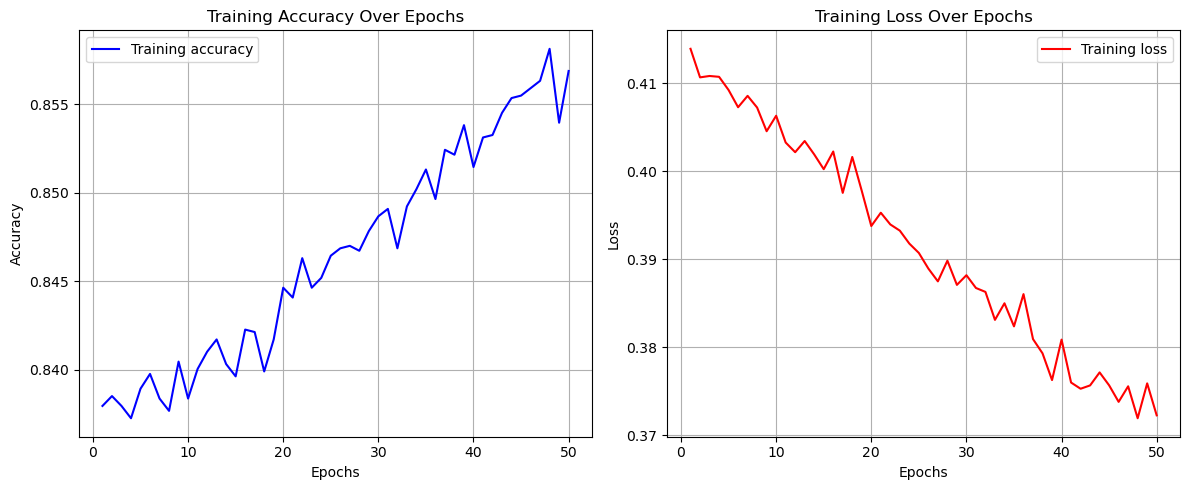

In [22]:
# plot our accuracy adn train loss on chart. We can see our model performs at 85% Accuracy with a decreasing training loss. We dont see overfit

import matplotlib.pyplot as plt

# Fit the model and store the training history
history = model.fit(x_train_scaled, y_train, epochs=50)

# Extract accuracy and loss values from the history
accuracy = history.history['accuracy']
loss = history.history['loss']

# Create a list of epochs (X-axis values)
epochs = range(1, len(accuracy) + 1)

# Create a figure with two subplots (one for accuracy and one for loss)
plt.figure(figsize=(12, 5))

# Plot the accuracy on the first subplot
plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.title('Training Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot the loss on the second subplot
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Adjust layout to avoid overlapping
plt.tight_layout()

# Show the combined chart with accuracy and loss
plt.show()

In [ ]:
# optional Export Predictions into a CSV File

import pandas as pd

predictions = model.predict(x_test_scaled)

# Create a DataFrame to store the predictions
predictions_df = pd.DataFrame({'Predictions': predictions.flatten()})

# Save the DataFrame to a CSV file
predictions_df.to_csv('predictions.csv', index=False)